# **UFO Sightings**




An increase in news articles, particularly on Unidentified Flying Objects, or UFOs. While we wait to comment, the Pentagon's UAP Task Force is anticipated to issue an unclassified version of the study sometime in late June 2021.

We will look at the steady increase of UFO sightings in USA and Canada from the [data](http://www.nuforc.org/webreports.html); 
 - date and time (1400 to 2021)
 - comments on the UFO
 - Shape of UFO
 - Location

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm

from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim


## **1. Preparation**

### **1.1 Load Data**

In [2]:
ufo= pd.read_csv('u_ufo.csv',low_memory=False)

In [3]:
ufo.head()

,date,city,state,address,duration,comments,shape
0,3/26/20 17:00,Weston,CT,"Connecticut, United States",Working,60 white lights over Weston CT 3/26/20,Circle
1,3/26/20 09:15,Wears Valley,TN,"Tennessee, United States",10 minutes,"There were 4 red objects in the sky, forming w...",Circle
2,3/26/20 08:53,Bailey,CO,"Colorado, United States",5 minutes,5 lights seen travelling in a straight line fo...,Circle
3,3/26/20 08:28,Orcutt,CA,"California, United States",10 minutes,At least 15 white lights traveling west to Eas...,Circle
4,3/26/20 06:00,Thurman,OH,"Ohio, United States",15-20 minutes,Line of lights like stars moving across the sk...,Circle


In [4]:
ufo.columns

Index(['date', 'city', 'state', 'address', 'duration', 'comments', 'shape'], dtype='object')

In [5]:
interesting_columns = ['date', 'city', 'state', 'address', 'comments', 'shape']
ufo = pd.DataFrame(ufo, columns=interesting_columns)

In [6]:
ufo.head()

,date,city,state,address,comments,shape
0,3/26/20 17:00,Weston,CT,"Connecticut, United States",60 white lights over Weston CT 3/26/20,Circle
1,3/26/20 09:15,Wears Valley,TN,"Tennessee, United States","There were 4 red objects in the sky, forming w...",Circle
2,3/26/20 08:53,Bailey,CO,"Colorado, United States",5 lights seen travelling in a straight line fo...,Circle
3,3/26/20 08:28,Orcutt,CA,"California, United States",At least 15 white lights traveling west to Eas...,Circle
4,3/26/20 06:00,Thurman,OH,"Ohio, United States",Line of lights like stars moving across the sk...,Circle


In [7]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94069 entries, 0 to 94068
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      94058 non-null  object
 1   city      94069 non-null  object
 2   state     94069 non-null  object
 3   address   94069 non-null  object
 4   comments  94049 non-null  object
 5   shape     92736 non-null  object
dtypes: object(6)
memory usage: 4.3+ MB


### **1.2 Data cleaning**

<AxesSubplot:>

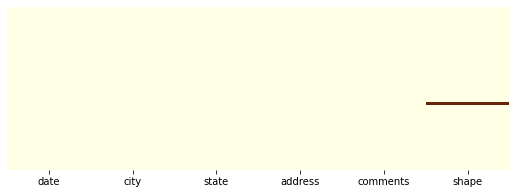

In [8]:
plt.figure(figsize=(9,3))
sns.heatmap(ufo.isnull(),cbar=False,yticklabels='',cmap='YlOrBr')

The shape column include the majority of the unknown/null instances, as shown in the heatmap above.

<AxesSubplot:>

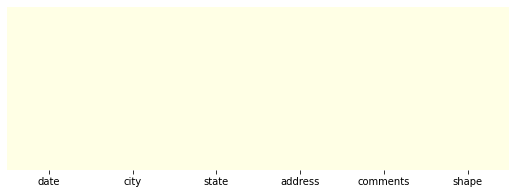

In [9]:
ufo = ufo.fillna(value=0)
plt.figure(figsize=(9,3))
sns.heatmap(ufo.isnull(),cbar=False,yticklabels='',cmap='YlOrBr')

In [10]:
ufo['date'] = pd.to_datetime(ufo['date'],errors='coerce')

 

In [11]:
ufo["shape"] = ufo["shape"].str.replace(r"[^a-zA-Z]+", " ", regex=True).str.strip() 

In [13]:
uniqueValues = ufo['shape'].unique()
print('Number of unique values in column "Age" of the dataframe : ')
print(uniqueValues)

Number of unique values in column "Age" of the dataframe : 
['Circle' 'Cone' 'Cross' 'Cylinder' 'Diamond' 'Disk' 'Egg' 'Fireball'
 'Flash' 'Formation' 'Light' 'Other' 'Oval' nan 'Changing' 'Chevron'
 'Cigar' 'Rectangle' 'Sphere' 'Teardrop' 'Triangle' 'TRIANGULAR' 'Unknown']


<br>

## **2. Data visualisation**

If an unidentified flying object exists, we will forecast the optimum time, month, and appearance of the UFO.

In [12]:
shape_unknown = ufo[(ufo['shape'] == 'Unknown') | (ufo['shape'] == 'Other') | (ufo['shape'] == '')]
shape_unknown_count = shape_unknown['shape'].count()
print("Shape couldn't be identified for {} sightings.".format(shape_unknown_count))


Shape couldn't be identified for 18076 sightings.


In [14]:
shape_known = ufo.drop(ufo[(ufo['shape'] == 'Unknown') | (ufo['shape'] == 'Other') | (ufo['shape'] == '')].index)
shape_known_count = shape_known['city'].count()
print("{} sightings could be distinguished by their shape.".format(shape_known_count))

75993 sightings could be distinguished by their shape.


In [15]:
percent_shape_known = ((shape_known_count)/(shape_known_count + shape_unknown_count))*100
print("{}% of the time, shapes were identified by the bystanders.".format(percent_shape_known.round(2)))

80.78% of the time, shapes were identified by the bystanders.


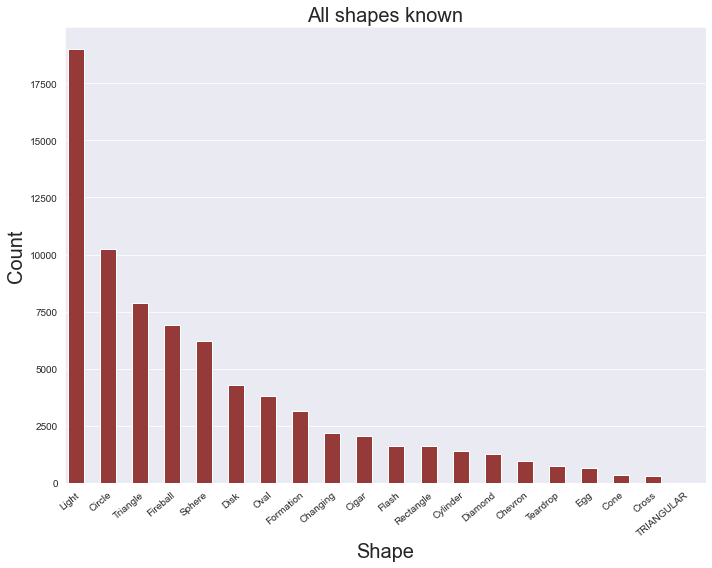

In [37]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
ax = sns.barplot(x =shape_known['shape'].value_counts().index, y = shape_known['shape'].value_counts().values, color = 'brown')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel('Shape').set_size(20)
ax.set_ylabel('Count').set_size(20)
ax.set_title('All shapes known').set_size(20)
plt.tight_layout()
for p in ax.patches:
        p.set_width(0.5)

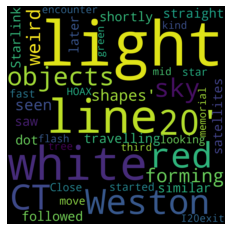

In [44]:
from wordcloud import WordCloud

text = ufo['comments'].values

wordcloud = WordCloud(width=1080, height=1080, margin=0).generate(str(text))


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

A large number of respondents referred to the entities in the sky as lights.

<br>

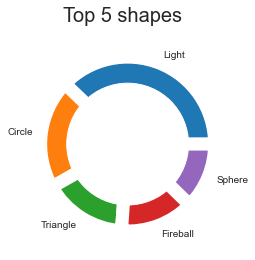

In [38]:
my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(shape_known['shape'].value_counts().head().values, labels=shape_known['shape'].value_counts().head().index, wedgeprops = { 'linewidth' : 13, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
p.suptitle('Top 5 shapes', fontsize=20)
plt.show()

It is evident that most of the sightings were reported as lights in the sky.

<br>

#### **2.1 Most Sightings in terms of time of day, month, and year, as well as location**

In [58]:
hours_most_sightings = ufo['date'].dt.hour.value_counts()
years_most_sightings = ufo['date'].dt.year.value_counts().head(15)
month_most_sightings = ufo['date'].dt.month.value_counts()
days_most_sightings = ufo['date'].dt.day.value_counts()

In [59]:
def top_years(year):
    if year in years_most_sightings.index:
        return year
hour_vs_year = ufo.pivot_table(columns=ufo['date'].dt.hour,index=ufo['date'].dt.year.apply(top_years),aggfunc='count',values='address')
hour_vs_year.columns = hour_vs_year.columns.astype(int)
hour_vs_year.columns = hour_vs_year.columns.astype(str) + ":00"
hour_vs_year.index = hour_vs_year.index.astype(int)
hour_vs_year

date,0:00,1:00,2:00,3:00,4:00,5:00,6:00,7:00,8:00,9:00,...,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00
date,,,,,,,,,,,,,,,,,,,,,
2001,462,139,79,72,53,100,106,64,37,24,...,31,44,68,171,252,309,282,229,187,172
2006,299,211,138,145,108,85,44,63,31,58,...,90,79,79,118,143,204,322,660,719,524
2007,444,266,180,167,121,109,63,40,66,80,...,103,103,101,136,187,281,591,1583,1788,999
2008,462,289,227,220,162,149,87,74,79,91,...,109,87,101,155,246,349,603,1036,1019,795
2009,343,244,147,150,143,166,122,59,62,105,...,70,99,89,139,227,430,806,998,794,611
2010,311,189,159,147,135,152,130,90,90,99,...,67,107,118,150,257,529,833,794,649,524
2011,322,246,135,141,106,157,123,79,85,81,...,76,100,143,316,729,767,744,845,685,499
2012,346,237,162,164,134,167,184,110,78,92,...,63,97,145,337,507,619,832,1035,891,592
2013,217,125,83,83,54,62,58,57,46,42,...,36,43,76,154,251,413,644,845,708,437


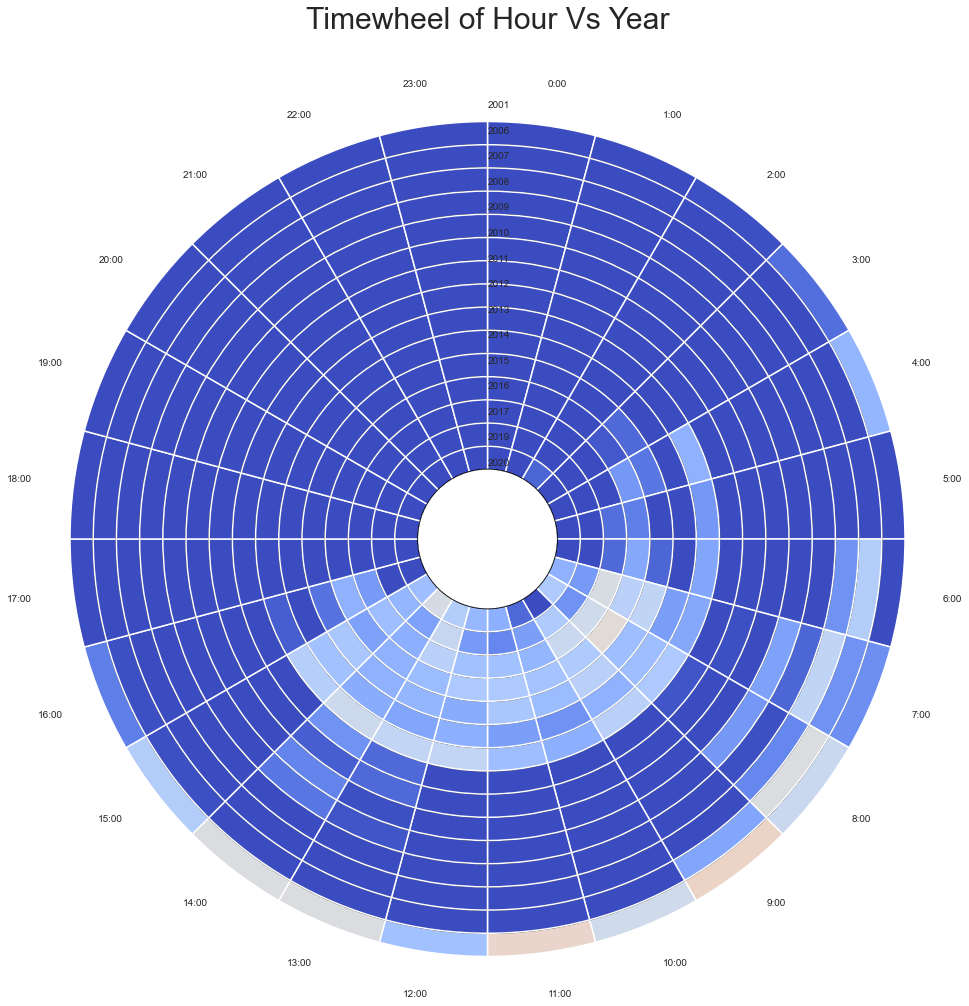

In [60]:
def pie_heatmap(table, cmap='coolwarm_r', vmin=None, vmax=None,inner_r=0.25, pie_args={}):
    n, m = table.shape
    vmin= table.min().min() if vmin is None else vmin
    vmax= table.max().max() if vmax is None else vmax

    centre_circle = plt.Circle((0,0),inner_r,edgecolor='black',facecolor='white',fill=True,linewidth=0.25)
    plt.gcf().gca().add_artist(centre_circle)
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    cmapper = cm.ScalarMappable(norm=norm, cmap=cmap)
  
    for i, (row_name, row) in enumerate(table.iterrows()):
        labels = None if i > 0 else table.columns
        wedges = plt.pie([1] * m,radius=inner_r+float(n-i)/n, colors=[cmapper.to_rgba(x) for x in row.values], 
            labels=labels, startangle=90, counterclock=False, wedgeprops={'linewidth':-1}, **pie_args)
        plt.setp(wedges[0], edgecolor='white',linewidth=1.5)
        wedges = plt.pie([1], radius=inner_r+float(n-i-1)/n, colors=['w'], labels=[row_name], startangle=-90, wedgeprops={'linewidth':0})
        plt.setp(wedges[0], edgecolor='black',linewidth=1.5)

plt.figure(figsize=(16,16))
plt.title("Timewheel of Hour Vs Year",y=1.08,fontsize=30)
pie_heatmap(hour_vs_year, vmin=-20,vmax=80,inner_r=0.2)

We can see from the timewheel that the majority of the sightings occurred after sundown. This is consistent with the fact that the majority of sightings were simply a 'light' in the sky.

<br>

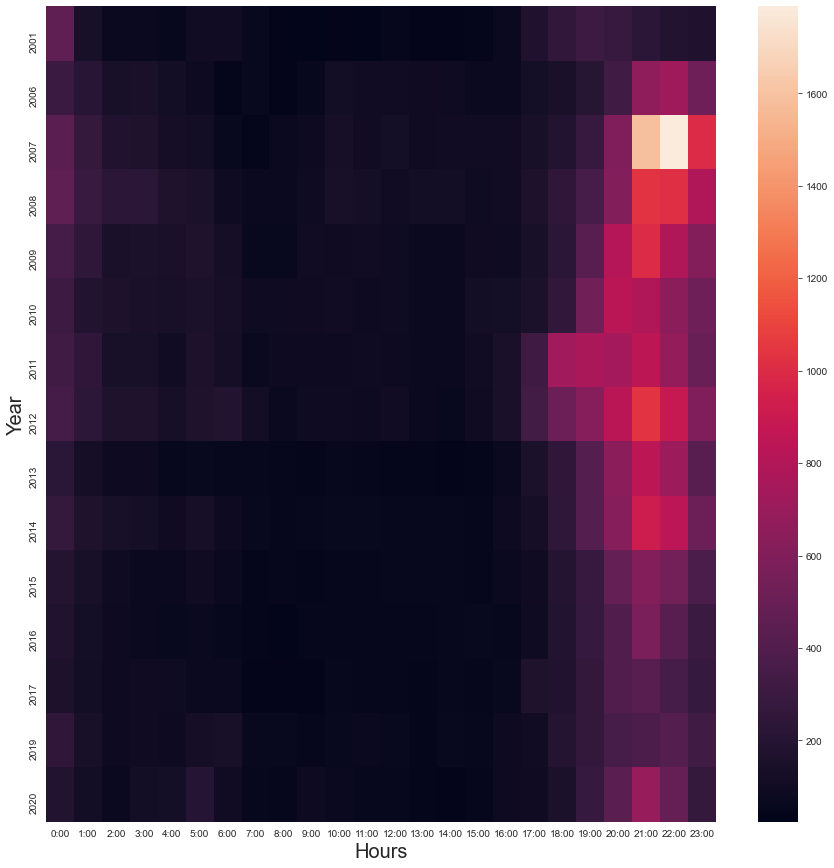

In [73]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(hour_vs_year)
ax.set_xlabel('Hours').set_size(20)
ax.set_ylabel('Year').set_size(20)

The majority of UFO encounters occurred between 1600 and midnight, with practically no sightings in the day.

<br>

In [66]:
month_vs_year = ufo.pivot_table(columns=ufo['date'].dt.month,index=ufo['date'].dt.year.apply(top_years),aggfunc='count',values='address')
month_vs_day = ufo.pivot_table(columns=ufo['date'].dt.month,index=ufo['date'].dt.day,aggfunc='count',values='address')
month_vs_year.columns = month_vs_year.columns.astype(int)
month_vs_year.columns = month_vs_year.columns.astype(int)
month_vs_year

date,1,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,
2001.0,698,204,235,213,179,250,238,219,189,214,190,192
2006.0,304,221,219,368,376,431,464,464,367,438,450,425
2007.0,563,385,663,1983,562,599,551,522,503,546,490,494
2008.0,625,503,511,554,491,548,595,606,504,631,605,638
2009.0,671,495,488,448,502,490,557,575,601,453,464,425
2010.0,520,339,405,397,506,483,584,661,560,596,406,434
2011.0,473,408,444,418,439,508,881,688,561,717,546,621
2012.0,495,360,582,517,509,712,669,671,627,691,613,693
2013.0,176,170,234,278,336,406,456,543,531,479,486,522


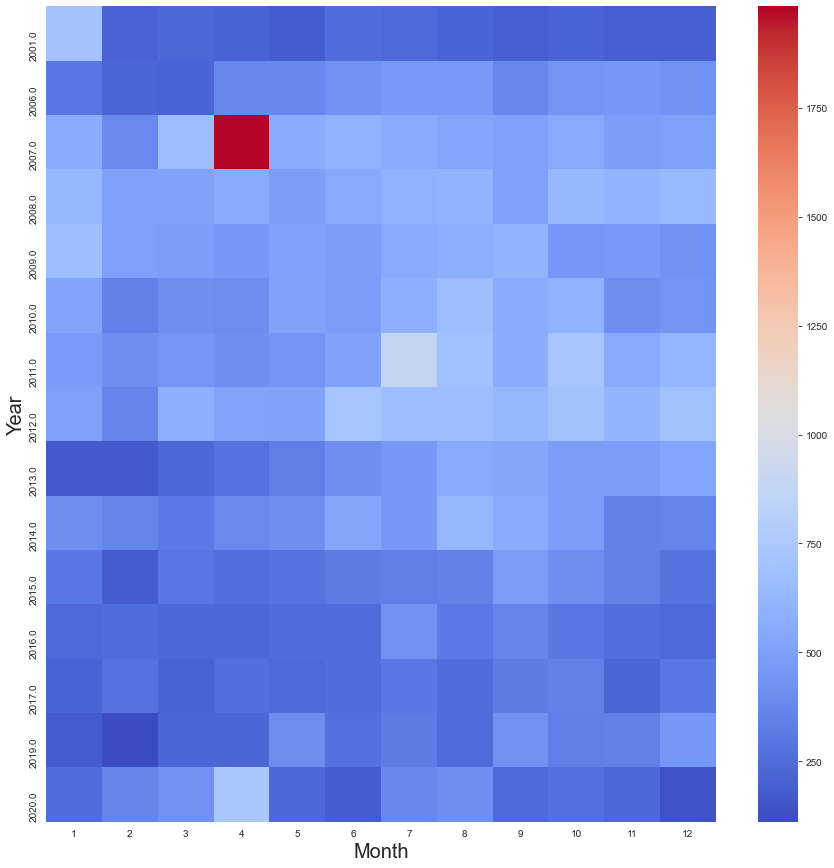

In [72]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(month_vs_year,cmap='coolwarm')
ax.set_xlabel('Month').set_size(20)
ax.set_ylabel('Year').set_size(20)

We may deduce from the heatmap that the majority of the sightings occurred in April of 2007. From 2007 to 2012, the number of instances began to rise and then began to decline.

<br>

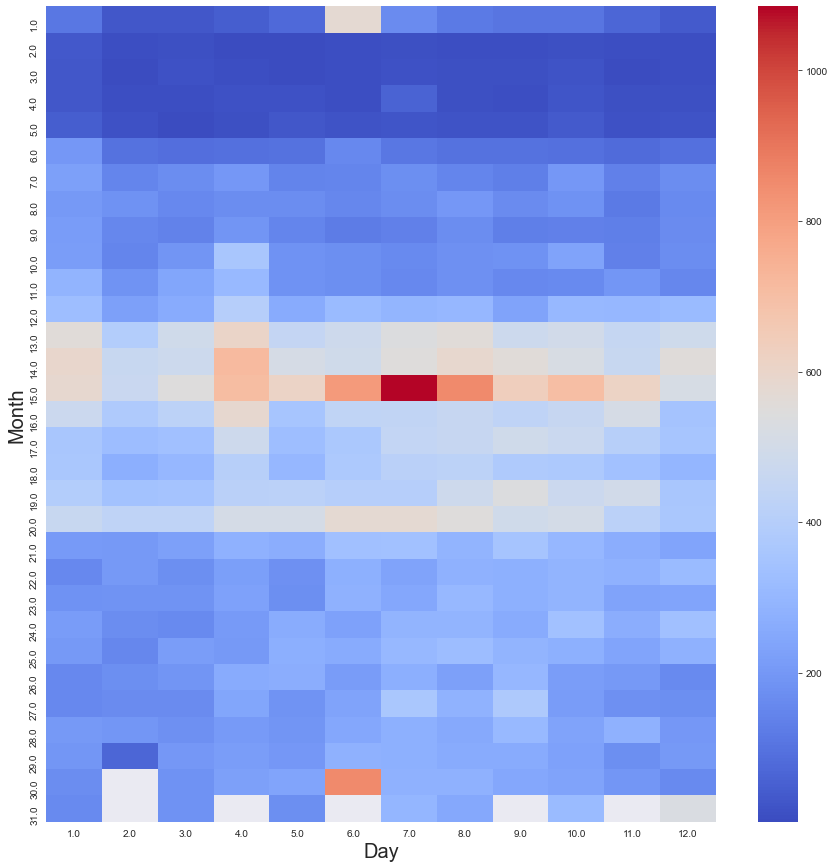

In [71]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(month_vs_day,cmap='coolwarm')
ax.set_xlabel('Day').set_size(20)
ax.set_ylabel('Month').set_size(20)

The majority of the sightings occurred between days 12 and 20 of each month, but mostly on day 15 of each month. The 17th of July is the busiest day for UFO sightings.

<br>

In [53]:
ufo['address'].value_counts()[:10].sort_values(ascending=False)

California, United States        10657
Florida, United States            5962
Washington, United States         4466
Texas, United States              3966
New York, United States           3949
Pennsylvania, United States       3615
Arizona, United States            3265
Ohio, United States               2995
Illinois, United States           2759
North Carolina, United States     2741
Name: address, dtype: int64

According to the information, California has the highest likelihood to see a UFO.

## **Conclusion** 

The best chance of sighting a UFO in Canada or the United States is to travel to California between 1800 and midnight; between the days 12 and 20 in the month of April. 

However, the ideal day to go UFO hunting in any of the American or Canadian states is July 17th.